In [1]:
%matplotlib inline

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Face Detection

1. Set Up Your Environment
Before starting, you need to install the necessary libraries for machine learning, face detection, and image processing. You can use Python and popular ML libraries such as TensorFlow or PyTorch, alongside OpenCV for image processing.

Run this to install the required dependencies:
 ``` pip install numpy pandas opencv-python matplotlib torch torchvision tqdm} ```

```pip install mtcnn```

2. Preprocessing the Dataset
You'll need to preprocess the datasets to standardize the input for your model. For the WIDER Face Dataset, images come in various scales and conditions, so resizing them to a uniform size will be necessary.

For the LFW Dataset, it already has labeled faces, but you may want to adjust image sizes and grayscale conversion.

Here’s a basic preprocessing function:

In [26]:
import cv2
import os
import numpy as np

def preprocess_images(image_dir, target_size=(224, 224)):
    images = []
    labels = []  # This will be used if you're working with labeled data like LFW
    image_folder = os.path.join(image_dir, 'lfw-deepfunneled')  # Path to the folder containing images
    
    for root, dirs, files in os.walk(image_folder):  # Traverse through subfolders
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):  # Ensure you're processing image files
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)
                if img is not None:
                    # Resize image to target size
                    img = cv2.resize(img, target_size)
                    # Convert image to grayscale (optional)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    images.append(img)
                    # You can assign labels if using LFW or custom labels
                    # labels.append(some_label)
    images = np.array(images)
    return images


You can now preprocess both datasets by passing their image directories:

In [27]:
# wider_images = preprocess_images("path_to_wider_images")
wf_data_path = "C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset"
lfw_images = preprocess_images(wf_data_path)

In [37]:
len(lfw_images)

13233

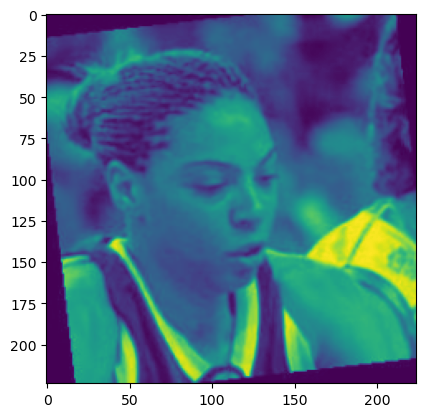

In [36]:
# plt.imshow(lfw_images[140])

3. Choose a Face Detection Model
There are several pre-trained models you can use for face detection:

Haar Cascades (from OpenCV)
MTCNN (Multi-task Cascaded Convolutional Networks)
YOLO (You Only Look Once) for face detection
Faster R-CNN (more complex, suitable for robust face detection)
For simplicity, let’s use MTCNN, a robust and accurate method for face detection.

First, install the MTCNN package:

In [39]:
# from mtcnn import MTCNN
# import matplotlib.pyplot as plt

# # Initialize the detector
# detector = MTCNN()

# def detect_faces(image):
#     # Detect faces in the image
#     results = detector.detect_faces(image)
    
#     # Plot detected faces
#     for result in results:
#         bounding_box = result['box']
#         cv2.rectangle(image, 
#                       (bounding_box[0], bounding_box[1]), 
#                       (bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]), 
#                       (0, 255, 0), 2)
    
#     # Display image
#     plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#     plt.show()

# # Test on one image
# image = cv2.imread(lfw_images[140])
# detect_faces(image)


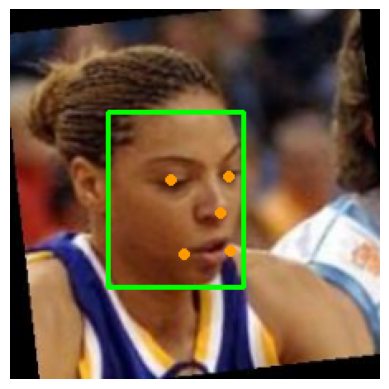

In [40]:
import cv2
import os
import numpy as np
from mtcnn import MTCNN
import matplotlib.pyplot as plt

# Initialize the MTCNN face detector
detector = MTCNN()

# Function to detect faces in an image
def detect_faces(image):
    # Detect faces in the image
    results = detector.detect_faces(image)
    
    # Plot and annotate detected faces
    for result in results:
        bounding_box = result['box']
        keypoints = result['keypoints']
        
        # Draw rectangle around the face
        cv2.rectangle(image, 
                      (bounding_box[0], bounding_box[1]), 
                      (bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]), 
                      (0, 255, 0), 2)
        
        # Annotate key points
        cv2.circle(image, keypoints['left_eye'], 2, (0, 155, 255), 2)
        cv2.circle(image, keypoints['right_eye'], 2, (0, 155, 255), 2)
        cv2.circle(image, keypoints['nose'], 2, (0, 155, 255), 2)
        cv2.circle(image, keypoints['mouth_left'], 2, (0, 155, 255), 2)
        cv2.circle(image, keypoints['mouth_right'], 2, (0, 155, 255), 2)
    
    # Convert image to RGB for displaying with matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

# Function to preprocess and resize images
def preprocess_images(image_dir, target_size=(224, 224)):
    images = []
    image_folder = os.path.join(image_dir, 'lfw-deepfunneled')  # Path to the folder containing images
    
    for root, dirs, files in os.walk(image_folder):  # Traverse through subfolders
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):  # Ensure you're processing image files
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)
                if img is not None:
                    # Resize image to target size
                    img = cv2.resize(img, target_size)
                    images.append(img)
                    
    images = np.array(images)
    return images

# Path to the LFW dataset
wf_data_path = "C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset"

# Preprocess and load LFW images
lfw_images = preprocess_images(wf_data_path)

# Display one example image and detect faces
image = lfw_images[140]  # Select an image from the preprocessed dataset
detect_faces(image)


4. Train a Custom Face Detection Model (Optional)
If you want to go beyond pre-trained models and train your own face detector, you can use a CNN-based model. Here's an example using PyTorch:

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

# Define a basic CNN architecture
class FaceDetectorCNN(nn.Module):
    def __init__(self):
        super(FaceDetectorCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(64*54*54, 128)
        self.fc2 = nn.Linear(128, 2)  # Binary classification: face or no face

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Prepare your data
transform = transforms.Compose([transforms.Resize((224, 224)),
                                transforms.ToTensor()])

# Use your preprocessed datasets (wider_images/lfw_images) here
train_dataset = datasets.ImageFolder('path_to_train_data', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Initialize model, loss, and optimizer
model = FaceDetectorCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10):  # Train for 10 epochs
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'path_to_train_data'

5. Evaluation on WIDER and LFW
Once your model is trained, evaluate its performance on both datasets:

Use metrics like precision, recall, accuracy, and F1-score for evaluation.
You can test the detection accuracy by comparing ground truth labels (provided in the WIDER dataset) with the predicted bounding boxes.


In [ ]:
from sklearn.metrics import classification_report

# Example function to evaluate
def evaluate_model(model, test_loader):
    all_preds = []
    all_labels = []
    
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds)
        all_labels.extend(labels)
    
    print(classification_report(all_labels, all_preds))


6. Visualizing Results
Visualize your model's detection results using matplotlib and OpenCV, as shown earlier in the detection part. You can draw bounding boxes around detected faces and see how well the model generalizes on unseen images.

